In [1]:
import torch
import numpy as np
import random

In [2]:
def check_win(board, player):
    """
    Check if the player can win in the next move and return all such moves.
    """
    winning_moves = []
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                            (0, 4, 8), (2, 4, 6)]  # diagonals
    for a, b, c in winning_combinations:
        if board[a] == board[b] == player and board[c] == ' ':
            winning_moves.append(c)
        if board[a] == board[c] == player and board[b] == ' ':
            winning_moves.append(b)
        if board[b] == board[c] == player and board[a] == ' ':
            winning_moves.append(a)
    return winning_moves

def check_block(board, player):
    """
    Check if the opponent can win in the next move and return all blocking moves.
    """
    opponent = 'O' if player == 'X' else 'X'
    return check_win(board, opponent)

def is_unblocked_line(board, player, a, b, c):
    """
    Check if a line (defined by indices a, b, c) is unblocked for the given player.
    """
    return ((board[a] == board[b] == player and board[c] == ' ') or
            (board[a] == board[c] == player and board[b] == ' ') or
            (board[b] == board[c] == player and board[a] == ' '))

def check_fork(board, player):
    """
    Check if the player can create a fork and return all such moves.
    """
    fork_moves = []
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                            (0, 4, 8), (2, 4, 6)]  # diagonals
    for i in range(9):
        if board[i] == ' ':
            board[i] = player  # Temporarily place the player's marker
            unblocked_lines = 0  # Count of unblocked lines
            for a, b, c in winning_combinations:
                if is_unblocked_line(board, player, a, b, c):
                    unblocked_lines += 1
            if unblocked_lines >= 2:
                fork_moves.append(i)
            board[i] = ' '  # Reset the board
    return fork_moves

def is_two_in_a_row(board, player, a, b, c):
    return ((board[a] == player and board[b] == player and board[c] == ' ') or
            (board[a] == player and board[c] == player and board[b] == ' ') or
            (board[b] == player and board[c] == player and board[a] == ' '))

# Update the check_block_fork function to include the additional logic
def check_block_fork(board, player):
    opponent = 'O' if player == 'X' else 'X'
    forks = check_fork(board, opponent)

    # Check if opponent has two opposite corners
    if board[0] == board[8] == opponent:
        if board[2] == ' ' or board[6] == ' ':
            to_rtn = []
            for i in [1, 3, 5, 7]:
                if board[i] == ' ': to_rtn.append(i)
            return to_rtn
    if board[2] == board[6] == opponent:
        if board[0] == ' ' or board[8] == ' ':
            to_rtn = []
            for i in [1, 3, 5, 7]:
                if board[i] == ' ': to_rtn.append(i)
            return to_rtn

    if len(forks) > 1:
        two_in_a_row_moves = []
        winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                                (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                                (0, 4, 8), (2, 4, 6)]  # diagonals
        for i in range(9):
            if board[i] == ' ':
                board[i] = player  # Temporarily place the player's marker
                for a, b, c in winning_combinations:
                    if is_two_in_a_row(board, player, a, b, c):
                        two_in_a_row_moves.append(i)
                        break  # No need to check further combinations for this move
                board[i] = ' '  # Reset the board
        # Return intersection of two_in_a_row_moves and forks
        return list(set(two_in_a_row_moves) & set(forks))
    if len(forks) == 1:
        return forks
    return []

def check_center(board):
    """
    Check if the center is free and return it as a move if it is.
    """
    return [4] if board[4] == ' ' else []

def check_opposite_corner(board, player):
    """
    Check if the opponent is in the corner, and the opposite corner is free, and return all such moves.
    """
    opponent = 'O' if player == 'X' else 'X'
    opposite_corners = [(0, 8), (2, 6), (6, 2), (8, 0)]
    moves = []
    for a, b in opposite_corners:
        if board[a] == opponent and board[b] == ' ':
            moves.append(b)
        if board[b] == opponent and board[a] == ' ':
            moves.append(a)
    return moves

def check_empty_corner(board):
    """
    Check for any empty corners and return all such moves.
    """
    corners = [0, 2, 6, 8]
    return [corner for corner in corners if board[corner] == ' ']

def check_empty_side(board):
    """
    Check for any empty sides and return all such moves.
    """
    sides = [1, 3, 5, 7]
    return [side for side in sides if board[side] == ' ']

# Update Main Function

def get_optimal_moves(board, player):
    """
    Get all optimal moves for the given board and player.
    """
    for check in [check_win, check_block, check_fork, check_block_fork]:
        moves = check(board, player)
        if moves:
            return moves

    for check in [check_center, check_empty_corner, check_empty_side]:
        moves = check(board)
        if moves:
            return moves

    for check in [check_opposite_corner]:
        moves = check(board, player)
        if moves:
            return moves

    return []  # Should never reach this point in a valid game of Tic-Tac-Toe

def is_winner(board, player):
    """
    Check if the player has won on the current board.
    """
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                            (0, 4, 8), (2, 4, 6)]  # diagonals
    for a, b, c in winning_combinations:
        if board[a] == board[b] == board[c] == player:
            return True
    return False

def is_game_over(board):
    """
    Returns True if the game is over, along with the winner ('X' or 'O') if there is one.
    """
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),
                            (0, 4, 8), (2, 4, 6)]
    for a, b, c in winning_combinations:
        if board[a] == board[b] == board[c] and board[a] != ' ':
            return True, board[a]  # Winner!
    if ' ' not in board:
        return True, None  # Draw
    return False, None  # Game continues

def get_legal_moves(board):
    return [i for i, x in enumerate(board) if x == ' '] # 9 represents an empty space

def random_player_move(board):
    legal_moves = get_legal_moves(board)
    return random.choice(legal_moves) if legal_moves else None

def tokenize_board_rep(board):
    tokenized_board_rep = [10 for i in range(10)]
    tokenized_board_rep[0] = 9

    num_Xs = np.sum(np.array(board) == 'X')
    num_Os = np.sum(np.array(board) == 'O')

    if num_Os > num_Xs:
        first_mover = 'O'
        second_mover = 'X'
    else:
        first_mover = 'X'
        second_mover = 'O'

    for (counter, index) in enumerate(np.where(np.array(board) == first_mover)[0]):
        tokenized_board_rep[counter*2+1] = index

    for (counter, index) in enumerate(np.where(np.array(board) == second_mover)[0]):
        tokenized_board_rep[counter*2+2] = index


    return tokenized_board_rep


board = [' ', 'O', 'O', 'X', 'X', ' ', ' ', ' ', ' ']
print(tokenize_board_rep(board))
is_game_over(board)

[9, 3, 1, 4, 2, 10, 10, 10, 10, 10]


(False, None)

In [3]:
# Check we win if we go optimally
# All functions as provided above
def random_player_move(board):
    """
    Returns a random legal move for the current board.
    """
    legal_moves = [i for i, spot in enumerate(board) if spot == ' ']
    return random.choice(legal_moves) if legal_moves else None

def simulate_game_optimal():
    """
    Simulates a single game of Tic-Tac-Toe with one player making optimal moves and the other making random moves.
    Randomly chooses which player starts.
    """
    board = [' '] * 9  # Initialize an empty board
    player_turn = random.choice(['X', 'O'])  # Randomly choose who goes first

    while True:
        if player_turn == 'X':
            optimal_move = get_optimal_moves(board, 'X')
            move = optimal_move[0] if optimal_move else None
        else:  # For 'O', make a random move
            move = random_player_move(board)

        if move is not None:
            board[move] = player_turn
        else:
            break  # If no move is possible, the game is a draw

        game_over, winner = is_game_over(board)
        if game_over:
            return winner

        player_turn = 'O' if player_turn == 'X' else 'X'  # Switch turns

def simulate_n_games(n):
    """
    Simulates n games of Tic-Tac-Toe and prints out statistics of wins, losses, and draws.
    """
    results = {'X': 0, 'O': 0, 'Draw': 0}
    for _ in range(n):
        winner = simulate_game_optimal()
        if winner == 'X':
            results['X'] += 1
        elif winner == 'O':
            results['O'] += 1
        else:
            results['Draw'] += 1

    return results

# Run the simulation for 100 games
n = 10000
game_results = simulate_n_games(n)
print(f"Game results after {n} simulations:")
print(game_results)

Game results after 10000 simulations:
{'X': 9136, 'O': 0, 'Draw': 864}


In [11]:
# Initialize list to store sequences of all finished games
finished_games = []

def simulate_game(board, move_sequence, next_player):
    """
    Simulate a game of Tic-Tac-Toe recursively.
    
    Parameters:
        board (list): The current game board.
        move_sequence (list): The sequence of moves made so far.
        next_player (str): The player to move next ('X' or 'O').
    """
    
    # Check for game over conditions (win or draw)
    if is_winner(board, 'X') or is_winner(board, 'O'):
        finished_games.append(move_sequence[:])
        return
    if ' ' not in board:
        finished_games.append(move_sequence[:])
        return
    
    # Optimal player's move
    if next_player == 'X':
        optimal_moves = get_optimal_moves(board, next_player)
        for move in optimal_moves:
            board[move] = next_player  # Make the move
            move_sequence.append(move)  # Record the move
            simulate_game(board, move_sequence, 'O')  # Recursive call
            board[move] = ' '  # Undo the move
            move_sequence.pop()  # Remove the last move from the sequence
    
    # All moves for the non-optimal player
    else:
        for move in range(9):
            if board[move] == ' ':
                board[move] = next_player  # Make the move
                move_sequence.append(move)  # Record the move
                simulate_game(board, move_sequence, 'X')  # Recursive call
                board[move] = ' '  # Undo the move
                move_sequence.pop()  # Remove the last move from the sequence

# Initialize board and move_sequence
initial_board = [' ' for _ in range(9)]
initial_move_sequence = []

# Start the simulation with 'X' going first
simulate_game(initial_board, initial_move_sequence, 'X')

# Show some of the finished games to verify correctness
finished_games[:10], len(finished_games)

([[4, 0, 2, 1, 6],
  [4, 0, 2, 3, 6],
  [4, 0, 2, 5, 6],
  [4, 0, 2, 6, 3, 1, 5],
  [4, 0, 2, 6, 3, 5, 8, 1, 7],
  [4, 0, 2, 6, 3, 5, 8, 7, 1],
  [4, 0, 2, 6, 3, 7, 5],
  [4, 0, 2, 6, 3, 8, 5],
  [4, 0, 2, 7, 6],
  [4, 0, 2, 8, 6]],
 488)

In [12]:
import pickle

# Save the list of lists to appropriate file
with open('finished_games.pkl', 'wb') as f:
    pickle.dump(finished_games, f)

# Load the list of lists from appropriate file
with open('finished_games.pkl', 'rb') as f:
    finished_games = pickle.load(f)

In [13]:
finished_games

[[4, 0, 2, 1, 6],
 [4, 0, 2, 3, 6],
 [4, 0, 2, 5, 6],
 [4, 0, 2, 6, 3, 1, 5],
 [4, 0, 2, 6, 3, 5, 8, 1, 7],
 [4, 0, 2, 6, 3, 5, 8, 7, 1],
 [4, 0, 2, 6, 3, 7, 5],
 [4, 0, 2, 6, 3, 8, 5],
 [4, 0, 2, 7, 6],
 [4, 0, 2, 8, 6],
 [4, 0, 6, 1, 2],
 [4, 0, 6, 2, 1, 3, 7],
 [4, 0, 6, 2, 1, 5, 7],
 [4, 0, 6, 2, 1, 7, 8, 3, 5],
 [4, 0, 6, 2, 1, 7, 8, 5, 3],
 [4, 0, 6, 2, 1, 8, 7],
 [4, 0, 6, 3, 2],
 [4, 0, 6, 5, 2],
 [4, 0, 6, 7, 2],
 [4, 0, 6, 8, 2],
 [4, 0, 8, 1, 2, 3, 5],
 [4, 0, 8, 1, 2, 3, 6],
 [4, 0, 8, 1, 2, 5, 6],
 [4, 0, 8, 1, 2, 6, 5],
 [4, 0, 8, 1, 2, 7, 5],
 [4, 0, 8, 1, 2, 7, 6],
 [4, 0, 8, 2, 1, 3, 7],
 [4, 0, 8, 2, 1, 5, 7],
 [4, 0, 8, 2, 1, 6, 7],
 [4, 0, 8, 2, 1, 7, 6, 3, 5],
 [4, 0, 8, 2, 1, 7, 6, 5, 3],
 [4, 0, 8, 3, 6, 1, 7],
 [4, 0, 8, 3, 6, 1, 2],
 [4, 0, 8, 3, 6, 2, 7],
 [4, 0, 8, 3, 6, 5, 7],
 [4, 0, 8, 3, 6, 5, 2],
 [4, 0, 8, 3, 6, 7, 2],
 [4, 0, 8, 5, 6, 1, 7],
 [4, 0, 8, 5, 6, 1, 2],
 [4, 0, 8, 5, 6, 2, 7],
 [4, 0, 8, 5, 6, 3, 7],
 [4, 0, 8, 5, 6, 3, 2],
 [4, 0, 8, 5, 6,

In [14]:
# Initialize list to store sequences of all finished games
finished_games_O_first = []
o_wins = 0

def simulate_game_O_first(board, move_sequence):
    """
    Simulate a game of Tic-Tac-Toe recursively where 'O' goes first.
    
    Parameters:
        board (list): The current game board.
        move_sequence (list): The sequence of moves made so far.
    """
    
    # Check for game over conditions (win or draw)
    if is_winner(board, 'X') or is_winner(board, 'O'):
        # if is_winner(board, 'X'): print("X won!")
        # if is_winner(board, 'O'): 
        #     print("O won!")
        finished_games_O_first.append(move_sequence[:])
        return
    if ' ' not in board:
        finished_games_O_first.append(move_sequence[:])
        return
    
    # All moves for the non-optimal player
    for move in range(9):
        if board[move] == ' ':
            board[move] = 'O'  # Make the move
            move_sequence.append(move)  # Record the move

            # Optimal player's move
            optimal_moves = get_optimal_moves(board, 'X')
            for x_move in optimal_moves:
                board[x_move] = 'X'  # Make the move
                move_sequence.append(x_move)  # Record the move 
                simulate_game_O_first(board, move_sequence)  # Recursive call
                board[x_move] = ' '  # Undo the move
                move_sequence.pop()  # Remove the last move from the sequence
                
            board[move] = ' '  # Undo the move
            move_sequence.pop()  # Remove the last move from the sequence

# Initialize board and move_sequence
initial_board = [' ' for _ in range(9)]
initial_move_sequence = []

# Start the simulation with 'O' going first
simulate_game_O_first(initial_board, initial_move_sequence)

# Show some of the finished games to verify correctness
finished_games_O_first[:10], len(finished_games_O_first)

([[0, 4, 1, 2, 3, 6],
  [0, 4, 1, 2, 5, 6],
  [0, 4, 1, 2, 6, 3, 7, 5],
  [0, 4, 1, 2, 6, 3, 8, 5],
  [0, 4, 1, 2, 7, 6],
  [0, 4, 1, 2, 8, 6],
  [0, 4, 2, 1, 3, 7],
  [0, 4, 2, 1, 5, 7],
  [0, 4, 2, 1, 6, 7],
  [0, 4, 2, 1, 8, 7]],
 656)

In [15]:
from torch.utils.data import Dataset, DataLoader
import torch

# Define the TicTacToeDataset class
class TicTacToeDataset(Dataset):
    def __init__(self, finished_games_X_first, finished_games_O_first):
        self.data = []
        
        # For games where X went first
        for game in finished_games_X_first:
            for i in range(1, len(game), 2):  # Only X's moves
                sub_seq = [9] + game[:i]
                self.data.append((sub_seq, game[i]))
        
        # For games where X went second
        for game in finished_games_O_first:
            for i in range(0, len(game), 2):  # Only X's moves
                sub_seq = [9] + game[:i+1]
                self.data.append((sub_seq, game[i+1]))
                
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# Custom collate function to handle sequences of varying lengths
def custom_collate(batch):
    sequences, labels = zip(*batch)
    
    # Pad sequences in the batch
    max_length = max([len(seq) for seq in sequences])
    padded_sequences = [seq + [10] * (max_length - len(seq)) for seq in sequences]  # Using 10 as the padding token
    
    # Convert to PyTorch tensors
    padded_sequences = torch.tensor(padded_sequences, dtype=torch.long)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return padded_sequences, labels

# Initialize the DataLoader with the custom collate function
tic_tac_toe_dataset = TicTacToeDataset(finished_games, finished_games_O_first)
data_loader = DataLoader(tic_tac_toe_dataset, batch_size=4, shuffle=True, collate_fn=custom_collate)

# Show a sample batch to validate the Dataset and DataLoader
for batch in data_loader:
    sample_batch = batch
    break

sample_batch

(tensor([[ 9,  4,  6,  2, 10, 10],
         [ 9,  4,  6,  2,  1,  5],
         [ 9,  3,  4,  5,  8,  7],
         [ 9,  4,  2,  8, 10, 10]]),
 tensor([5, 7, 0, 0]))

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('mps')

class TicTacToeTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_layers, num_classes):
        super(TicTacToeTransformer, self).__init__()
        
        # Embedding Layer
        self.embedding = nn.Embedding(11, d_model)  # 11 classes: board positions (0-8), start (9), and padding (10)
        
        # Positional Encoding
        # positional_encoding = torch.arange(1, 11).unsqueeze(1).repeat(1, d_model)  # Create a (10, d_model) tensor with values from 1 to 10
        # self.register_buffer('positional_encoding', positional_encoding.float())  # Register it as a buffer
        # Positional Encoding
        self.positional_encoding = self.create_positional_encoding(d_model)
        #self.position_embedding = nn.Embedding(num_embeddings=20000, embedding_dim=d_model)
        
        # Transformer Decoder
        self.transformer = nn.Transformer(d_model, nhead, num_layers, num_layers, dim_feedforward=d_model*4)
        
        # Output Layer
        self.fc_out = nn.Linear(d_model, num_classes)

        # Initialisation function
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def create_positional_encoding(self, d_model, max_len=20000):
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)  # Shape (max_len, 1, d_model)
        return pe.to(device)
        
    def forward(self, x, targets=None):
        # Robustly get the index of the first padding token (index = 10) for each sequence in the batch
        pad_idx = torch.tensor([seq.tolist().index(10) if 10 in seq.tolist() else seq.size(0) - 1 for seq in x])
        
        # Embedding
        x = self.embedding(x)
        
        # Positional Encoding (Added to the embedding)
        #x += self.positional_encoding[:x.size(1), :]  # Only add positional encoding up to the sequence length
        x += self.positional_encoding[:x.size(0), :]
        
        # Permute the tensor dimensions to match transformer's expected input shape
        x = x.permute(1, 0, 2)
        
        # Transformer Forward Pass
        tgt_mask = self.transformer.generate_square_subsequent_mask(x.size(0)).to(x.device)
        x = self.transformer(x, x, tgt_mask=tgt_mask)
        
        # Permute back to (batch_size, seq_length, d_model) for the output layer
        x = x.permute(1, 0, 2)
        
        # Output Layer
        # Use gathered indices to pick the logits corresponding to the last non-padding token
        logits = self.fc_out(x[torch.arange(x.size(0)), pad_idx, :])
        
        # Loss calculation, if targets are provided
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits, targets, ignore_index=10)  # 10 is the padding token
        
        return logits, loss

d_model = 64  # Dimension of the model
nhead = 4  # Number of heads in multi-head attention
num_layers = 2  # Number of transformer layers
num_classes = 9  # Number of board positions

# Initialize the model
model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.to(device)

# Perform a forward pass using the sample batch
sample_sequences, sample_labels = sample_batch
logits, loss = model(sample_sequences.to(device), sample_labels.to(device))

logits.shape, F.softmax(logits, dim=1), loss


(torch.Size([4, 9]),
 tensor([[0.1218, 0.1140, 0.1299, 0.1121, 0.0942, 0.0945, 0.1096, 0.1493, 0.0747],
         [0.1122, 0.1133, 0.1228, 0.1174, 0.0953, 0.0916, 0.1150, 0.1540, 0.0784],
         [0.1045, 0.1138, 0.1231, 0.1279, 0.0957, 0.0894, 0.1228, 0.1393, 0.0835],
         [0.1062, 0.1205, 0.1203, 0.1329, 0.0966, 0.0949, 0.1239, 0.1232, 0.0817]],
        device='mps:0', grad_fn=<SoftmaxBackward0>),
 tensor(2.1830, device='mps:0', grad_fn=<NllLossBackward0>))

In [17]:
def model_move(model, board, device):
    # Convert the board to a tensor and add a batch dimension.
    board_tensor = torch.tensor(tokenize_board_rep(board), dtype=torch.long).unsqueeze(0).to(device)
    
    # Get the move probabilities from the model.
    with torch.no_grad():
        logits, _ = model(board_tensor)
    probabilities = F.softmax(logits, dim=1).squeeze(0).cpu().numpy()
    
    # Get the legal moves and set the probabilities of illegal moves to 0.
    legal_moves = get_legal_moves(board)
    illegal_moves = [i for i in range(9) if i not in legal_moves]
    probabilities[illegal_moves] = 0
    
    # Choose the legal move with the highest probability.
    return np.argmax(probabilities)

def print_board(board):
    # The board is expected to be a list of characters: 'X', 'O', or ' '
    print(f"{board[0]}|{board[1]}|{board[2]}")
    print("-+-+-")
    print(f"{board[3]}|{board[4]}|{board[5]}")
    print("-+-+-")
    print(f"{board[6]}|{board[7]}|{board[8]}")
    print()

def simulate_game_stats(model, device, n=1):
    results = {'model_wins': 0, 'random_wins': 0, 'draws': 0}
    for _ in range(n):
        board = [' '] * 9 # 9 represents an empty space
        model_turn = random.choice([True, False])
        game_over = False
        
        while not game_over:
            if model_turn:
                move = model_move(model, board, device)
                board[move] = 1 # Assume 1 represents the model's moves
            else:
                # Make a random legal move (without using random_player_move function)
                move = random.choice([i for i, spot in enumerate(board) if spot == ' '])
                if move is not None:
                    board[move] = 0 # Assume 0 represents the random player's moves
            
            game_over, winner = is_game_over(board)
            model_turn = not model_turn # Switch turns

            if game_over:
                if winner == 1:
                    results['model_wins'] += 1
                elif winner == 0:
                    results['random_wins'] += 1
                else:
                    results['draws'] += 1
    
    return results

In [18]:
%cd ~/Documents/tictac

[Errno 2] No such file or directory: '/Users/charlesoneill/Documents/tictac'
/Users/charlesoneill/tictac


In [19]:
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Hyperparameters
learning_rate = 1e-3
epochs = 1000  # Number of epochs to train for

d_model = 128  # Dimension of the model
nhead = 8  # Number of heads in multi-head attention
num_layers = 2  # Number of transformer layers
num_classes = 9  # Number of board positions

# Initialize the model
from_pretrained=True
name = "tic_tac_toe_transformer"
if from_pretrained:
    model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
    model.load_state_dict(torch.load(f'{name}.pth'))
else: model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)

# Define the device as 'cuda' if available, else 'cpu'
device = torch.device('mps')

# Move the model to the appropriate device
model.to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define the DataLoader
batch_size = 2048
data_loader = DataLoader(tic_tac_toe_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)

# Training loop
model.eval() 
train_losses, model_win_p = [], []
results = simulate_game_stats(model, device, n=100)
print(f"Simulation results - Model wins: {results['model_wins']}, Random wins: {results['random_wins']}, Draws: {results['draws']}")
model.train()
for epoch in tqdm(range(epochs), desc='Epochs'):
    total_loss = 0
    for batch_idx, (sequences, labels) in enumerate(data_loader):
        # Move data to the device
        sequences, labels = sequences.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits, loss = model(sequences, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Aggregate the loss
        total_loss += loss.item()
    
    # Print the average loss for the epoch
    avg_loss = total_loss / (batch_idx + 1)
    # If we have beaten our current best loss, save the model
    if len(train_losses) > 0 and avg_loss < min(train_losses):
        torch.save(model.state_dict(), f'{name}.pth')

    train_losses.append(avg_loss)
    if (epoch+1) % 10 == 0:
            
        print(f'Epoch {epoch+1} completed: Avg. Loss: {avg_loss:.4f}')
        # Set the model to evaluation mode for simulation
        model.eval()
        # Simulate games
        results = simulate_game_stats(model, device, n=100)
        print(f"Simulation results - Model wins: {results['model_wins']}, Random wins: {results['random_wins']}, Draws: {results['draws']}")
        model_win_p.append(results['model_wins'] / 100)
        model.train()

torch.save(model.state_dict(), f'{name}.pth')
print('Model training complete and saved to disk.')

/Users/charlesoneill/miniconda3/envs/honours/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Simulation results - Model wins: 76, Random wins: 15, Draws: 9


Epochs:   1%|          | 9/1000 [00:09<16:43,  1.01s/it]

Epoch 10 completed: Avg. Loss: 1.7966


Epochs:   1%|          | 10/1000 [00:13<32:34,  1.97s/it]

Simulation results - Model wins: 68, Random wins: 18, Draws: 14


Epochs:   2%|▏         | 19/1000 [00:23<17:52,  1.09s/it]

Epoch 20 completed: Avg. Loss: 1.7926


Epochs:   2%|▏         | 20/1000 [00:27<33:29,  2.05s/it]

Simulation results - Model wins: 60, Random wins: 33, Draws: 7


Epochs:   3%|▎         | 29/1000 [00:37<17:29,  1.08s/it]

Epoch 30 completed: Avg. Loss: 1.7889


Epochs:   3%|▎         | 30/1000 [00:41<32:07,  1.99s/it]

Simulation results - Model wins: 58, Random wins: 31, Draws: 11


Epochs:   4%|▍         | 39/1000 [00:50<16:58,  1.06s/it]

Epoch 40 completed: Avg. Loss: 1.7738


Epochs:   4%|▍         | 40/1000 [00:54<31:53,  1.99s/it]

Simulation results - Model wins: 60, Random wins: 30, Draws: 10


Epochs:   5%|▍         | 49/1000 [01:03<16:44,  1.06s/it]

Epoch 50 completed: Avg. Loss: 1.7283


Epochs:   5%|▌         | 50/1000 [01:07<30:16,  1.91s/it]

Simulation results - Model wins: 71, Random wins: 20, Draws: 9


Epochs:   6%|▌         | 59/1000 [01:16<16:38,  1.06s/it]

Epoch 60 completed: Avg. Loss: 1.6798


Epochs:   6%|▌         | 60/1000 [01:20<30:31,  1.95s/it]

Simulation results - Model wins: 71, Random wins: 17, Draws: 12


Epochs:   7%|▋         | 69/1000 [01:30<16:33,  1.07s/it]

Epoch 70 completed: Avg. Loss: 1.6220


Epochs:   7%|▋         | 70/1000 [01:34<31:01,  2.00s/it]

Simulation results - Model wins: 54, Random wins: 35, Draws: 11


Epochs:   8%|▊         | 79/1000 [01:43<16:19,  1.06s/it]

Epoch 80 completed: Avg. Loss: 1.5683


Epochs:   8%|▊         | 80/1000 [01:47<30:51,  2.01s/it]

Simulation results - Model wins: 71, Random wins: 17, Draws: 12


Epochs:   9%|▉         | 89/1000 [01:57<16:08,  1.06s/it]

Epoch 90 completed: Avg. Loss: 1.5122


Epochs:   9%|▉         | 90/1000 [02:01<30:36,  2.02s/it]

Simulation results - Model wins: 63, Random wins: 31, Draws: 6


Epochs:  10%|▉         | 99/1000 [02:10<15:55,  1.06s/it]

Epoch 100 completed: Avg. Loss: 1.4636


Epochs:  10%|█         | 100/1000 [02:14<29:48,  1.99s/it]

Simulation results - Model wins: 61, Random wins: 28, Draws: 11


Epochs:  11%|█         | 109/1000 [02:24<16:21,  1.10s/it]

Epoch 110 completed: Avg. Loss: 1.4168


Epochs:  11%|█         | 110/1000 [02:28<29:42,  2.00s/it]

Simulation results - Model wins: 66, Random wins: 22, Draws: 12


Epochs:  12%|█▏        | 119/1000 [02:38<16:09,  1.10s/it]

Epoch 120 completed: Avg. Loss: 1.3592


Epochs:  12%|█▏        | 120/1000 [02:41<27:40,  1.89s/it]

Simulation results - Model wins: 75, Random wins: 18, Draws: 7


Epochs:  13%|█▎        | 129/1000 [02:51<16:26,  1.13s/it]

Epoch 130 completed: Avg. Loss: 1.3355


Epochs:  13%|█▎        | 130/1000 [02:55<27:41,  1.91s/it]

Simulation results - Model wins: 74, Random wins: 18, Draws: 8


Epochs:  14%|█▍        | 139/1000 [03:04<15:25,  1.08s/it]

Epoch 140 completed: Avg. Loss: 1.3182


Epochs:  14%|█▍        | 140/1000 [03:08<27:26,  1.91s/it]

Simulation results - Model wins: 62, Random wins: 26, Draws: 12


Epochs:  15%|█▍        | 149/1000 [03:18<15:14,  1.08s/it]

Epoch 150 completed: Avg. Loss: 1.2843


Epochs:  15%|█▌        | 150/1000 [03:22<27:16,  1.92s/it]

Simulation results - Model wins: 62, Random wins: 25, Draws: 13


Epochs:  16%|█▌        | 159/1000 [03:31<15:16,  1.09s/it]

Epoch 160 completed: Avg. Loss: 1.2330


Epochs:  16%|█▌        | 160/1000 [03:35<28:20,  2.02s/it]

Simulation results - Model wins: 62, Random wins: 28, Draws: 10


Epochs:  17%|█▋        | 169/1000 [03:45<14:48,  1.07s/it]

Epoch 170 completed: Avg. Loss: 1.2230


Epochs:  17%|█▋        | 170/1000 [03:49<27:20,  1.98s/it]

Simulation results - Model wins: 58, Random wins: 30, Draws: 12


Epochs:  18%|█▊        | 179/1000 [03:58<14:52,  1.09s/it]

Epoch 180 completed: Avg. Loss: 1.1963


Epochs:  18%|█▊        | 180/1000 [04:03<28:53,  2.11s/it]

Simulation results - Model wins: 52, Random wins: 27, Draws: 21


Epochs:  19%|█▉        | 189/1000 [04:12<14:47,  1.09s/it]

Epoch 190 completed: Avg. Loss: 1.1563


Epochs:  19%|█▉        | 190/1000 [04:17<28:31,  2.11s/it]

Simulation results - Model wins: 57, Random wins: 28, Draws: 15


Epochs:  20%|█▉        | 199/1000 [04:27<15:05,  1.13s/it]

Epoch 200 completed: Avg. Loss: 1.1295


Epochs:  20%|██        | 200/1000 [04:31<27:59,  2.10s/it]

Simulation results - Model wins: 45, Random wins: 32, Draws: 23


Epochs:  21%|██        | 209/1000 [04:40<14:15,  1.08s/it]

Epoch 210 completed: Avg. Loss: 1.1035


Epochs:  21%|██        | 210/1000 [04:45<27:24,  2.08s/it]

Simulation results - Model wins: 47, Random wins: 33, Draws: 20


Epochs:  22%|██▏       | 219/1000 [04:54<14:05,  1.08s/it]

Epoch 220 completed: Avg. Loss: 1.0799


Epochs:  22%|██▏       | 220/1000 [04:58<26:29,  2.04s/it]

Simulation results - Model wins: 29, Random wins: 45, Draws: 26


Epochs:  23%|██▎       | 229/1000 [05:08<13:50,  1.08s/it]

Epoch 230 completed: Avg. Loss: 1.0535


Epochs:  23%|██▎       | 230/1000 [05:12<27:25,  2.14s/it]

Simulation results - Model wins: 41, Random wins: 29, Draws: 30


Epochs:  24%|██▍       | 239/1000 [05:22<13:36,  1.07s/it]

Epoch 240 completed: Avg. Loss: 1.0244


Epochs:  24%|██▍       | 240/1000 [05:26<26:42,  2.11s/it]

Simulation results - Model wins: 38, Random wins: 40, Draws: 22


Epochs:  25%|██▍       | 249/1000 [05:36<13:27,  1.07s/it]

Epoch 250 completed: Avg. Loss: 1.0281


Epochs:  25%|██▌       | 250/1000 [05:40<26:10,  2.09s/it]

Simulation results - Model wins: 41, Random wins: 36, Draws: 23


Epochs:  26%|██▌       | 259/1000 [05:49<13:13,  1.07s/it]

Epoch 260 completed: Avg. Loss: 1.0058


Epochs:  26%|██▌       | 260/1000 [05:54<25:10,  2.04s/it]

Simulation results - Model wins: 43, Random wins: 37, Draws: 20


Epochs:  27%|██▋       | 269/1000 [06:03<13:02,  1.07s/it]

Epoch 270 completed: Avg. Loss: 0.9812


Epochs:  27%|██▋       | 270/1000 [06:07<24:47,  2.04s/it]

Simulation results - Model wins: 50, Random wins: 34, Draws: 16


Epochs:  28%|██▊       | 279/1000 [06:17<12:59,  1.08s/it]

Epoch 280 completed: Avg. Loss: 0.9720


Epochs:  28%|██▊       | 280/1000 [06:21<24:57,  2.08s/it]

Simulation results - Model wins: 54, Random wins: 38, Draws: 8


Epochs:  29%|██▉       | 289/1000 [06:31<12:46,  1.08s/it]

Epoch 290 completed: Avg. Loss: 0.9707


Epochs:  29%|██▉       | 290/1000 [06:35<24:28,  2.07s/it]

Simulation results - Model wins: 55, Random wins: 36, Draws: 9


Epochs:  30%|██▉       | 299/1000 [06:44<12:38,  1.08s/it]

Epoch 300 completed: Avg. Loss: 0.9522


Epochs:  30%|███       | 300/1000 [06:49<24:23,  2.09s/it]

Simulation results - Model wins: 46, Random wins: 44, Draws: 10


Epochs:  31%|███       | 309/1000 [06:58<12:29,  1.09s/it]

Epoch 310 completed: Avg. Loss: 0.9492


Epochs:  31%|███       | 310/1000 [07:03<24:10,  2.10s/it]

Simulation results - Model wins: 47, Random wins: 36, Draws: 17


Epochs:  32%|███▏      | 319/1000 [07:12<12:44,  1.12s/it]

Epoch 320 completed: Avg. Loss: 0.9409


Epochs:  32%|███▏      | 320/1000 [07:17<23:38,  2.09s/it]

Simulation results - Model wins: 47, Random wins: 42, Draws: 11


Epochs:  33%|███▎      | 329/1000 [07:26<11:59,  1.07s/it]

Epoch 330 completed: Avg. Loss: 0.9426


Epochs:  33%|███▎      | 330/1000 [07:30<22:45,  2.04s/it]

Simulation results - Model wins: 55, Random wins: 37, Draws: 8


Epochs:  34%|███▍      | 339/1000 [07:40<11:57,  1.09s/it]

Epoch 340 completed: Avg. Loss: 0.9428


Epochs:  34%|███▍      | 340/1000 [07:44<22:20,  2.03s/it]

Simulation results - Model wins: 43, Random wins: 47, Draws: 10


Epochs:  35%|███▍      | 349/1000 [07:54<12:00,  1.11s/it]

Epoch 350 completed: Avg. Loss: 0.9354


Epochs:  35%|███▌      | 350/1000 [07:58<22:25,  2.07s/it]

Simulation results - Model wins: 33, Random wins: 53, Draws: 14


Epochs:  36%|███▌      | 359/1000 [08:08<11:52,  1.11s/it]

Epoch 360 completed: Avg. Loss: 0.9212


Epochs:  36%|███▌      | 360/1000 [08:12<22:46,  2.14s/it]

Simulation results - Model wins: 47, Random wins: 35, Draws: 18


Epochs:  37%|███▋      | 369/1000 [08:22<12:02,  1.15s/it]

Epoch 370 completed: Avg. Loss: 0.9127


Epochs:  37%|███▋      | 370/1000 [08:27<22:51,  2.18s/it]

Simulation results - Model wins: 53, Random wins: 38, Draws: 9


Epochs:  38%|███▊      | 379/1000 [08:37<11:39,  1.13s/it]

Epoch 380 completed: Avg. Loss: 0.9296


Epochs:  38%|███▊      | 380/1000 [08:41<21:58,  2.13s/it]

Simulation results - Model wins: 59, Random wins: 36, Draws: 5


Epochs:  39%|███▉      | 389/1000 [08:51<11:28,  1.13s/it]

Epoch 390 completed: Avg. Loss: 0.9191


Epochs:  39%|███▉      | 390/1000 [08:55<21:36,  2.13s/it]

Simulation results - Model wins: 46, Random wins: 47, Draws: 7


Epochs:  40%|███▉      | 399/1000 [09:05<10:53,  1.09s/it]

Epoch 400 completed: Avg. Loss: 0.9128


Epochs:  40%|████      | 400/1000 [09:09<20:25,  2.04s/it]

Simulation results - Model wins: 59, Random wins: 38, Draws: 3


Epochs:  41%|████      | 409/1000 [09:18<10:41,  1.09s/it]

Epoch 410 completed: Avg. Loss: 0.9103


Epochs:  41%|████      | 410/1000 [09:23<19:31,  1.99s/it]

Simulation results - Model wins: 32, Random wins: 59, Draws: 9


Epochs:  42%|████▏     | 419/1000 [09:32<10:29,  1.08s/it]

Epoch 420 completed: Avg. Loss: 0.9077


Epochs:  42%|████▏     | 420/1000 [09:36<20:01,  2.07s/it]

Simulation results - Model wins: 51, Random wins: 45, Draws: 4


Epochs:  43%|████▎     | 429/1000 [09:46<10:16,  1.08s/it]

Epoch 430 completed: Avg. Loss: 0.8953


Epochs:  43%|████▎     | 430/1000 [09:50<19:16,  2.03s/it]

Simulation results - Model wins: 51, Random wins: 44, Draws: 5


Epochs:  44%|████▍     | 439/1000 [10:00<10:04,  1.08s/it]

Epoch 440 completed: Avg. Loss: 0.9106


Epochs:  44%|████▍     | 440/1000 [10:04<19:15,  2.06s/it]

Simulation results - Model wins: 47, Random wins: 41, Draws: 12


Epochs:  45%|████▍     | 449/1000 [10:13<09:56,  1.08s/it]

Epoch 450 completed: Avg. Loss: 0.9034


Epochs:  45%|████▌     | 450/1000 [10:18<18:39,  2.04s/it]

Simulation results - Model wins: 38, Random wins: 44, Draws: 18


Epochs:  46%|████▌     | 459/1000 [10:27<09:44,  1.08s/it]

Epoch 460 completed: Avg. Loss: 0.9044


Epochs:  46%|████▌     | 460/1000 [10:32<18:44,  2.08s/it]

Simulation results - Model wins: 51, Random wins: 33, Draws: 16


Epochs:  47%|████▋     | 469/1000 [10:41<09:33,  1.08s/it]

Epoch 470 completed: Avg. Loss: 0.9081


Epochs:  47%|████▋     | 470/1000 [10:45<17:45,  2.01s/it]

Simulation results - Model wins: 38, Random wins: 51, Draws: 11


Epochs:  48%|████▊     | 479/1000 [10:55<09:18,  1.07s/it]

Epoch 480 completed: Avg. Loss: 0.9070


Epochs:  48%|████▊     | 480/1000 [10:59<17:55,  2.07s/it]

Simulation results - Model wins: 42, Random wins: 45, Draws: 13


Epochs:  49%|████▉     | 489/1000 [11:08<09:09,  1.08s/it]

Epoch 490 completed: Avg. Loss: 0.8947


Epochs:  49%|████▉     | 490/1000 [11:13<17:38,  2.07s/it]

Simulation results - Model wins: 50, Random wins: 38, Draws: 12


Epochs:  50%|████▉     | 499/1000 [11:22<09:04,  1.09s/it]

Epoch 500 completed: Avg. Loss: 0.8953


Epochs:  50%|█████     | 500/1000 [11:27<17:13,  2.07s/it]

Simulation results - Model wins: 48, Random wins: 43, Draws: 9


Epochs:  51%|█████     | 509/1000 [11:36<08:47,  1.07s/it]

Epoch 510 completed: Avg. Loss: 0.9007


Epochs:  51%|█████     | 510/1000 [11:40<16:32,  2.02s/it]

Simulation results - Model wins: 42, Random wins: 49, Draws: 9


Epochs:  52%|█████▏    | 519/1000 [11:50<08:37,  1.08s/it]

Epoch 520 completed: Avg. Loss: 0.9028


Epochs:  52%|█████▏    | 520/1000 [11:54<16:36,  2.08s/it]

Simulation results - Model wins: 51, Random wins: 39, Draws: 10


Epochs:  53%|█████▎    | 529/1000 [12:04<08:39,  1.10s/it]

Epoch 530 completed: Avg. Loss: 0.8915


Epochs:  53%|█████▎    | 530/1000 [12:08<16:42,  2.13s/it]

Simulation results - Model wins: 44, Random wins: 46, Draws: 10


Epochs:  54%|█████▍    | 539/1000 [12:18<08:19,  1.08s/it]

Epoch 540 completed: Avg. Loss: 0.8875


Epochs:  54%|█████▍    | 540/1000 [12:22<16:14,  2.12s/it]

Simulation results - Model wins: 46, Random wins: 44, Draws: 10


Epochs:  55%|█████▍    | 549/1000 [12:31<08:11,  1.09s/it]

Epoch 550 completed: Avg. Loss: 0.8907


Epochs:  55%|█████▌    | 550/1000 [12:36<15:40,  2.09s/it]

Simulation results - Model wins: 41, Random wins: 53, Draws: 6


Epochs:  56%|█████▌    | 559/1000 [12:45<07:37,  1.04s/it]

Epoch 560 completed: Avg. Loss: 0.8973


Epochs:  56%|█████▌    | 560/1000 [12:49<14:56,  2.04s/it]

Simulation results - Model wins: 39, Random wins: 53, Draws: 8


Epochs:  57%|█████▋    | 569/1000 [12:58<07:40,  1.07s/it]

Epoch 570 completed: Avg. Loss: 0.8857


Epochs:  57%|█████▋    | 570/1000 [13:03<14:48,  2.07s/it]

Simulation results - Model wins: 48, Random wins: 43, Draws: 9


Epochs:  58%|█████▊    | 579/1000 [13:12<07:29,  1.07s/it]

Epoch 580 completed: Avg. Loss: 0.8818


Epochs:  58%|█████▊    | 580/1000 [13:17<14:25,  2.06s/it]

Simulation results - Model wins: 37, Random wins: 41, Draws: 22


Epochs:  59%|█████▉    | 589/1000 [13:26<07:17,  1.06s/it]

Epoch 590 completed: Avg. Loss: 0.8830


Epochs:  59%|█████▉    | 590/1000 [13:30<14:04,  2.06s/it]

Simulation results - Model wins: 43, Random wins: 51, Draws: 6


Epochs:  60%|█████▉    | 599/1000 [13:40<07:06,  1.06s/it]

Epoch 600 completed: Avg. Loss: 0.8912


Epochs:  60%|██████    | 600/1000 [13:44<13:56,  2.09s/it]

Simulation results - Model wins: 43, Random wins: 46, Draws: 11


Epochs:  61%|██████    | 609/1000 [13:53<06:40,  1.02s/it]

Epoch 610 completed: Avg. Loss: 0.8915


Epochs:  61%|██████    | 610/1000 [13:57<13:00,  2.00s/it]

Simulation results - Model wins: 44, Random wins: 41, Draws: 15


Epochs:  62%|██████▏   | 619/1000 [14:06<06:11,  1.03it/s]

Epoch 620 completed: Avg. Loss: 0.8885


Epochs:  62%|██████▏   | 620/1000 [14:10<12:35,  1.99s/it]

Simulation results - Model wins: 53, Random wins: 40, Draws: 7


Epochs:  63%|██████▎   | 629/1000 [14:19<06:05,  1.02it/s]

Epoch 630 completed: Avg. Loss: 0.8962


Epochs:  63%|██████▎   | 630/1000 [14:23<12:14,  1.99s/it]

Simulation results - Model wins: 55, Random wins: 38, Draws: 7


Epochs:  64%|██████▍   | 639/1000 [14:32<06:15,  1.04s/it]

Epoch 640 completed: Avg. Loss: 0.8826


Epochs:  64%|██████▍   | 640/1000 [14:36<12:17,  2.05s/it]

Simulation results - Model wins: 42, Random wins: 50, Draws: 8


Epochs:  65%|██████▍   | 649/1000 [14:46<06:13,  1.06s/it]

Epoch 650 completed: Avg. Loss: 0.8810


Epochs:  65%|██████▌   | 650/1000 [14:50<11:57,  2.05s/it]

Simulation results - Model wins: 38, Random wins: 50, Draws: 12


Epochs:  66%|██████▌   | 659/1000 [14:59<05:51,  1.03s/it]

Epoch 660 completed: Avg. Loss: 0.8857


Epochs:  66%|██████▌   | 660/1000 [15:03<11:30,  2.03s/it]

Simulation results - Model wins: 40, Random wins: 46, Draws: 14


Epochs:  67%|██████▋   | 669/1000 [15:12<05:41,  1.03s/it]

Epoch 670 completed: Avg. Loss: 0.8843


Epochs:  67%|██████▋   | 670/1000 [15:17<11:09,  2.03s/it]

Simulation results - Model wins: 47, Random wins: 47, Draws: 6


Epochs:  68%|██████▊   | 679/1000 [15:26<05:41,  1.06s/it]

Epoch 680 completed: Avg. Loss: 0.8779


Epochs:  68%|██████▊   | 680/1000 [15:30<10:56,  2.05s/it]

Simulation results - Model wins: 52, Random wins: 39, Draws: 9


Epochs:  69%|██████▉   | 689/1000 [15:40<05:37,  1.08s/it]

Epoch 690 completed: Avg. Loss: 0.8833


Epochs:  69%|██████▉   | 690/1000 [15:44<10:47,  2.09s/it]

Simulation results - Model wins: 45, Random wins: 48, Draws: 7


Epochs:  70%|██████▉   | 699/1000 [15:54<05:27,  1.09s/it]

Epoch 700 completed: Avg. Loss: 0.8793


Epochs:  70%|███████   | 700/1000 [15:58<10:23,  2.08s/it]

Simulation results - Model wins: 38, Random wins: 44, Draws: 18


Epochs:  71%|███████   | 709/1000 [16:07<05:12,  1.07s/it]

Epoch 710 completed: Avg. Loss: 0.8776


Epochs:  71%|███████   | 710/1000 [16:12<10:10,  2.11s/it]

Simulation results - Model wins: 47, Random wins: 41, Draws: 12


Epochs:  72%|███████▏  | 719/1000 [16:21<05:03,  1.08s/it]

Epoch 720 completed: Avg. Loss: 0.8805


Epochs:  72%|███████▏  | 720/1000 [16:25<09:16,  1.99s/it]

Simulation results - Model wins: 49, Random wins: 34, Draws: 17


Epochs:  73%|███████▎  | 729/1000 [16:35<04:51,  1.07s/it]

Epoch 730 completed: Avg. Loss: 0.8749


Epochs:  73%|███████▎  | 730/1000 [16:39<08:44,  1.94s/it]

Simulation results - Model wins: 51, Random wins: 35, Draws: 14


Epochs:  74%|███████▍  | 739/1000 [16:48<04:43,  1.09s/it]

Epoch 740 completed: Avg. Loss: 0.8809


Epochs:  74%|███████▍  | 740/1000 [16:52<08:51,  2.05s/it]

Simulation results - Model wins: 51, Random wins: 38, Draws: 11


Epochs:  75%|███████▍  | 749/1000 [17:02<04:30,  1.08s/it]

Epoch 750 completed: Avg. Loss: 0.8762


Epochs:  75%|███████▌  | 750/1000 [17:06<08:26,  2.02s/it]

Simulation results - Model wins: 49, Random wins: 39, Draws: 12


Epochs:  76%|███████▌  | 759/1000 [17:16<04:32,  1.13s/it]

Epoch 760 completed: Avg. Loss: 0.8767


Epochs:  76%|███████▌  | 760/1000 [17:20<08:36,  2.15s/it]

Simulation results - Model wins: 42, Random wins: 32, Draws: 26


Epochs:  77%|███████▋  | 769/1000 [17:30<04:18,  1.12s/it]

Epoch 770 completed: Avg. Loss: 0.8805


Epochs:  77%|███████▋  | 770/1000 [17:34<08:00,  2.09s/it]

Simulation results - Model wins: 56, Random wins: 31, Draws: 13


Epochs:  78%|███████▊  | 779/1000 [17:44<04:05,  1.11s/it]

Epoch 780 completed: Avg. Loss: 0.8703


Epochs:  78%|███████▊  | 780/1000 [17:48<07:04,  1.93s/it]

Simulation results - Model wins: 59, Random wins: 35, Draws: 6


Epochs:  79%|███████▉  | 789/1000 [17:58<03:46,  1.07s/it]

Epoch 790 completed: Avg. Loss: 0.8766


Epochs:  79%|███████▉  | 790/1000 [18:02<06:57,  1.99s/it]

Simulation results - Model wins: 61, Random wins: 33, Draws: 6


Epochs:  80%|███████▉  | 799/1000 [18:11<03:37,  1.08s/it]

Epoch 800 completed: Avg. Loss: 0.8808


Epochs:  80%|████████  | 800/1000 [18:16<06:49,  2.05s/it]

Simulation results - Model wins: 46, Random wins: 38, Draws: 16


Epochs:  81%|████████  | 809/1000 [18:25<03:27,  1.09s/it]

Epoch 810 completed: Avg. Loss: 0.8768


Epochs:  81%|████████  | 810/1000 [18:29<06:18,  1.99s/it]

Simulation results - Model wins: 53, Random wins: 33, Draws: 14


Epochs:  82%|████████▏ | 819/1000 [18:39<03:20,  1.11s/it]

Epoch 820 completed: Avg. Loss: 0.8819


Epochs:  82%|████████▏ | 820/1000 [18:43<06:04,  2.02s/it]

Simulation results - Model wins: 60, Random wins: 26, Draws: 14


Epochs:  83%|████████▎ | 829/1000 [18:53<03:07,  1.10s/it]

Epoch 830 completed: Avg. Loss: 0.8750


Epochs:  83%|████████▎ | 830/1000 [18:57<05:41,  2.01s/it]

Simulation results - Model wins: 55, Random wins: 30, Draws: 15


Epochs:  84%|████████▍ | 839/1000 [19:06<02:53,  1.08s/it]

Epoch 840 completed: Avg. Loss: 0.8720


Epochs:  84%|████████▍ | 840/1000 [19:10<05:16,  1.98s/it]

Simulation results - Model wins: 55, Random wins: 30, Draws: 15


Epochs:  85%|████████▍ | 849/1000 [19:20<02:43,  1.08s/it]

Epoch 850 completed: Avg. Loss: 0.8718


Epochs:  85%|████████▌ | 850/1000 [19:24<04:59,  2.00s/it]

Simulation results - Model wins: 61, Random wins: 29, Draws: 10


Epochs:  86%|████████▌ | 859/1000 [19:33<02:32,  1.08s/it]

Epoch 860 completed: Avg. Loss: 0.8681


Epochs:  86%|████████▌ | 860/1000 [19:38<04:53,  2.10s/it]

Simulation results - Model wins: 39, Random wins: 35, Draws: 26


Epochs:  87%|████████▋ | 869/1000 [19:47<02:20,  1.07s/it]

Epoch 870 completed: Avg. Loss: 0.8737


Epochs:  87%|████████▋ | 870/1000 [19:51<04:20,  2.00s/it]

Simulation results - Model wins: 47, Random wins: 39, Draws: 14


Epochs:  88%|████████▊ | 879/1000 [20:00<02:09,  1.07s/it]

Epoch 880 completed: Avg. Loss: 0.8770


Epochs:  88%|████████▊ | 880/1000 [20:05<04:05,  2.04s/it]

Simulation results - Model wins: 42, Random wins: 37, Draws: 21


Epochs:  89%|████████▉ | 889/1000 [20:14<02:02,  1.10s/it]

Epoch 890 completed: Avg. Loss: 0.8700


Epochs:  89%|████████▉ | 890/1000 [20:19<03:49,  2.08s/it]

Simulation results - Model wins: 46, Random wins: 30, Draws: 24


Epochs:  90%|████████▉ | 899/1000 [20:28<01:49,  1.08s/it]

Epoch 900 completed: Avg. Loss: 0.8703


Epochs:  90%|█████████ | 900/1000 [20:33<03:26,  2.07s/it]

Simulation results - Model wins: 35, Random wins: 44, Draws: 21


Epochs:  91%|█████████ | 909/1000 [20:42<01:37,  1.07s/it]

Epoch 910 completed: Avg. Loss: 0.8695


Epochs:  91%|█████████ | 910/1000 [20:46<03:06,  2.08s/it]

Simulation results - Model wins: 49, Random wins: 34, Draws: 17


Epochs:  92%|█████████▏| 919/1000 [20:56<01:28,  1.09s/it]

Epoch 920 completed: Avg. Loss: 0.8760


Epochs:  92%|█████████▏| 920/1000 [21:00<02:43,  2.05s/it]

Simulation results - Model wins: 45, Random wins: 40, Draws: 15


Epochs:  93%|█████████▎| 929/1000 [21:09<01:17,  1.09s/it]

Epoch 930 completed: Avg. Loss: 0.8760


Epochs:  93%|█████████▎| 930/1000 [21:14<02:26,  2.10s/it]

Simulation results - Model wins: 40, Random wins: 31, Draws: 29


Epochs:  94%|█████████▍| 939/1000 [21:23<01:06,  1.08s/it]

Epoch 940 completed: Avg. Loss: 0.8695


Epochs:  94%|█████████▍| 940/1000 [21:27<02:00,  2.01s/it]

Simulation results - Model wins: 56, Random wins: 26, Draws: 18


Epochs:  95%|█████████▍| 949/1000 [21:37<00:54,  1.07s/it]

Epoch 950 completed: Avg. Loss: 0.8698


Epochs:  95%|█████████▌| 950/1000 [21:41<01:41,  2.04s/it]

Simulation results - Model wins: 38, Random wins: 38, Draws: 24


Epochs:  96%|█████████▌| 959/1000 [21:51<00:44,  1.09s/it]

Epoch 960 completed: Avg. Loss: 0.8763


Epochs:  96%|█████████▌| 960/1000 [21:55<01:23,  2.08s/it]

Simulation results - Model wins: 45, Random wins: 34, Draws: 21


Epochs:  97%|█████████▋| 969/1000 [22:04<00:33,  1.09s/it]

Epoch 970 completed: Avg. Loss: 0.8744


Epochs:  97%|█████████▋| 970/1000 [22:09<01:01,  2.03s/it]

Simulation results - Model wins: 39, Random wins: 40, Draws: 21


Epochs:  98%|█████████▊| 979/1000 [22:18<00:22,  1.08s/it]

Epoch 980 completed: Avg. Loss: 0.8715


Epochs:  98%|█████████▊| 980/1000 [22:22<00:41,  2.07s/it]

Simulation results - Model wins: 52, Random wins: 32, Draws: 16


Epochs:  99%|█████████▉| 989/1000 [22:32<00:11,  1.09s/it]

Epoch 990 completed: Avg. Loss: 0.8670


Epochs:  99%|█████████▉| 990/1000 [22:36<00:20,  2.05s/it]

Simulation results - Model wins: 55, Random wins: 31, Draws: 14


Epochs: 100%|█████████▉| 999/1000 [22:46<00:01,  1.12s/it]

Epoch 1000 completed: Avg. Loss: 0.8712


Epochs: 100%|██████████| 1000/1000 [22:50<00:00,  1.37s/it]

Simulation results - Model wins: 42, Random wins: 41, Draws: 17
Model training complete and saved to disk.


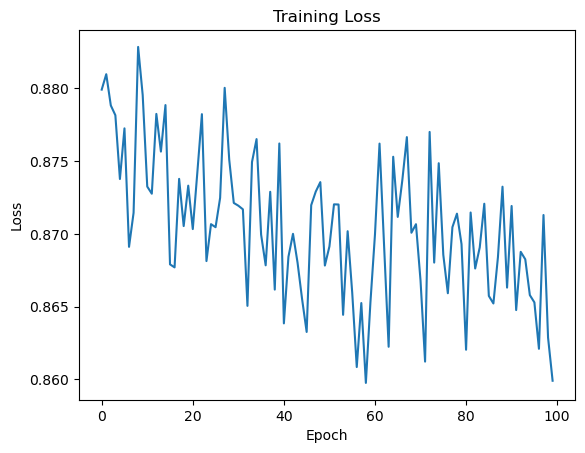

In [60]:
# Plot the training losses nicely
import matplotlib.pyplot as plt

# Plot with circles at each data point
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Test it by playing against a random player

In [42]:
import torch
import numpy as np
import random

# Load the trained model
model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.load_state_dict(torch.load(f'{name}.pth'))
model.to(device)
model.eval() # Set the model to evaluation mode

# Simulate games
n=200
results = simulate_game_stats(model, device, n=n)
print(f"Out of {n} games, the model won {results['model_wins']} times, the random player won {results['random_wins']} times, and there were {results['draws']} draws.")

Out of 200 games, the model won 136 times, the random player won 54 times, and there were 10 draws.


In [53]:
# Load the trained model
def compare_moves_and_probabilities(model, board, optimal_moves, device):
    # Translate the board from 'X', 'O', ' ' to numeric format
    #numeric_board = [1 if x == 'X' else 0 if x == 'O' else 9 for x in board]
    numeric_board = tokenize_board_rep(board)
    
    # Convert the numeric board to tensor, add batch dimension, and add the start token
    #board_with_start = [9] + numeric_board  # Include the start token
    board_tensor = torch.tensor(numeric_board, dtype=torch.long).unsqueeze(0).to(device)
    
    # Get move probabilities from the model
    with torch.no_grad():
        logits, _ = model(board_tensor)
    probabilities = F.softmax(logits, dim=1).squeeze(0).cpu().numpy()

    # Print the board
    print_board(board)
    
    # Print optimal moves
    print(f"Optimal moves according to the algorithm: {optimal_moves}")
    
    # Print model's move probabilities, skipping the first element for the start token
    print("Model's move probabilities for each position (excluding start token):")
    for i, prob in enumerate(probabilities): 
        print(f"Position {i}: {prob:.4f}")
    print()

# TO-DO: Fix this diagnostic function
def simulate_and_compare(model, device, num_games=500):
    for game_index in range(num_games):
        # Initialize the game board with ' ' representing empty spaces
        board = [' '] * 9
        player = 'X'  # Assume the model plays 'X'
        opponent = 'O'  # Assume the opponent plays 'O'

        # Randomly choose who goes first
        model_turn = random.choice([True, False])
                
        game_over = False
        while not game_over:
            if model_turn:
                # Convert the board to the model's expected numeric input format
                numeric_board = tokenize_board_rep(board)
                # Get the optimal moves for the model
                optimal_moves = get_optimal_moves(board, player)  # Un-comment this line
                # Make the model's move
                chosen_move = model_move(model, board, device)
                # Compare and print the probabilities and optimal moves
                compare_moves_and_probabilities(model, board, optimal_moves, device)  # Now passing optimal_moves
                # Update the board with the model's move
                board[chosen_move] = player
            else:
                move = random_player_move(board)
                if move is not None:  # Safeguard to check if move is valid
                    board[move] = opponent

            # Check if game is over
            game_over, winner = is_game_over(board)
            if game_over:
                # Print the result of the game
                print(f"Game {game_index + 1}: Winner is {'Model' if winner == player else 'Opponent' if winner == opponent else 'None'}, draw" if winner == -1 else "")
                print_board(board)

            # Switch turns
            model_turn = not model_turn
            


d_model = 128  # Dimension of the model
nhead = 8  # Number of heads in multi-head attention
num_layers = 2  # Number of transformer layers
num_classes = 9  # Number of board positions
model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.load_state_dict(torch.load(f'{name}.pth'))
model.to(device)
model.eval()  # Set the model to evaluation mode

# Simulate a few games and compare the moves
simulate_and_compare(model, device, num_games=1)

 | | 
-+-+-
O| | 
-+-+-
 | | 

Optimal moves according to the algorithm: [4]
Model's move probabilities for each position (excluding start token):
Position 0: 0.0000
Position 1: 0.0000
Position 2: 0.0000
Position 3: 0.0000
Position 4: 1.0000
Position 5: 0.0000
Position 6: 0.0000
Position 7: 0.0000
Position 8: 0.0000

 | |O
-+-+-
O|X| 
-+-+-
 | | 

Optimal moves according to the algorithm: [0]
Model's move probabilities for each position (excluding start token):
Position 0: 0.9998
Position 1: 0.0000
Position 2: 0.0000
Position 3: 0.0000
Position 4: 0.0001
Position 5: 0.0000
Position 6: 0.0000
Position 7: 0.0000
Position 8: 0.0001

X| |O
-+-+-
O|X| 
-+-+-
 | |O

Optimal moves according to the algorithm: [5]
Model's move probabilities for each position (excluding start token):
Position 0: 0.0000
Position 1: 0.0020
Position 2: 0.0000
Position 3: 0.0000
Position 4: 0.0052
Position 5: 0.9832
Position 6: 0.0089
Position 7: 0.0000
Position 8: 0.0005

X|O|O
-+-+-
O|X|X
-+-+-
 | |O

Optimal move

In [58]:
def track_optimal_move_percentage(model, device, num_games=500):
    total_moves = 0
    optimal_moves_made = 0
    non_optimal_moves_made = []
    
    for game_index in range(num_games):
        board = [' '] * 9
        player = 'X'
        opponent = 'O'
        
        model_turn = random.choice([True, False])
        game_over = False
        
        while not game_over:
            if model_turn:
                optimal_moves = get_optimal_moves(board, player)
                chosen_move = model_move(model, board, device)
                
                compare_moves_and_probabilities(model, board, optimal_moves, device)

                board[chosen_move] = player
                
                if chosen_move in optimal_moves:
                    optimal_moves_made += 1
                else:
                    print(f"Chosen move: {chosen_move}, but optimal moves were: {optimal_moves}")
                    non_optimal_moves_made.append((chosen_move, tuple(optimal_moves)))
                total_moves += 1
            else:
                move = random_player_move(board)
                if move is not None:
                    board[move] = opponent
                    
            game_over, winner = is_game_over(board)
            if game_over:
                print(f"Game {game_index + 1}: Winner is {'Model' if winner == player else 'Opponent' if winner == opponent else 'None'}, draw" if winner == -1 else "")
            model_turn = not model_turn
            
    if total_moves > 0:
        optimal_move_percentage = (optimal_moves_made / total_moves) * 100
        print(f"Optimal move percentage: {optimal_move_percentage:.2f}%")
        print(non_optimal_moves_made)
    else:
        print("No moves were made to track optimal move percentage.")

track_optimal_move_percentage(model, device, num_games=100)

O| | 
-+-+-
 | | 
-+-+-
 | | 

Optimal moves according to the algorithm: [4]
Model's move probabilities for each position (excluding start token):
Position 0: 0.0000
Position 1: 0.0000
Position 2: 0.0000
Position 3: 0.0000
Position 4: 1.0000
Position 5: 0.0000
Position 6: 0.0000
Position 7: 0.0000
Position 8: 0.0000

O| | 
-+-+-
O|X| 
-+-+-
 | | 

Optimal moves according to the algorithm: [6]
Model's move probabilities for each position (excluding start token):
Position 0: 0.0000
Position 1: 0.0000
Position 2: 0.0000
Position 3: 0.0000
Position 4: 0.0003
Position 5: 0.0000
Position 6: 0.9997
Position 7: 0.0000
Position 8: 0.0000

O| | 
-+-+-
O|X| 
-+-+-
X| |O

Optimal moves according to the algorithm: [2]
Model's move probabilities for each position (excluding start token):
Position 0: 0.0000
Position 1: 0.0000
Position 2: 1.0000
Position 3: 0.0000
Position 4: 0.0000
Position 5: 0.0000
Position 6: 0.0000
Position 7: 0.0000
Position 8: 0.0000


 | | 
-+-+-
 | | 
-+-+-
 | | 

Optimal mov